In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

import elastic_database as edb
import seismic_tools as st

In [2]:
chl = edb.chlorite()

In [3]:
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Stiffness Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Calculated average properties:
Bulk Modulus averages (GPa)
Upper bound (Voigt) = 85.222
Average (Hill--VRH) = 82.553
Lower bound (Reuss) = 79.883

Shear Modulus averages (GPa)
Upper bound (Voigt) = = 51.793
Average (Hill--VRH)  = 45.772
Lower bound (Reuss) = 39.751

Isotropic Average Poisson Ratio
Average (Hill--VRH)  = 0.266

Pugh's ratio
Average (Hill--VRH)  = 1.804

Anisotropy indexes
Universal Elastic Anisotropy: 1.581
Kube's Anisotropy Index (proportional): 0.595

Seismic properties (Hill averages)
Isotropic Average

In [4]:
model = st.weak_polar_anisotropy(chl)

In [5]:
model

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.025977,0.000000,7.300035,3.116033,3.111383
2,0.026454,0.067775,7.299973,3.116277,3.111456
3,0.026922,0.135550,7.299911,3.116522,3.111529
4,0.027383,0.203325,7.299849,3.116766,3.111601
...,...,...,...,...,...
79995,1.570740,5.488482,8.996070,3.109423,6.015781
79996,1.570753,5.556257,8.996070,3.109423,6.015781
79997,1.570765,5.624032,8.996070,3.109423,6.015781
79998,1.570778,5.691807,8.996070,3.109423,6.015781


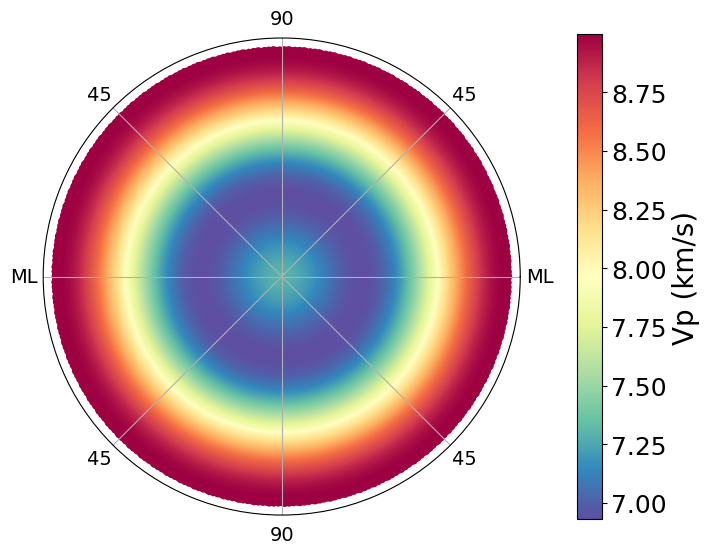

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

# rough contour 
# cs = ax.tricontour(model['azimuthal_ang'],
#                    model['polar_ang'],
#                    model['Vp'],
#                    levels=[7.0, 7.5, 8.0, 8.5],
#                    linestyles="solid", colors="k", linewidths=2.0)
# ax.clabel(cs, cs.levels, inline=True, fontsize=10)

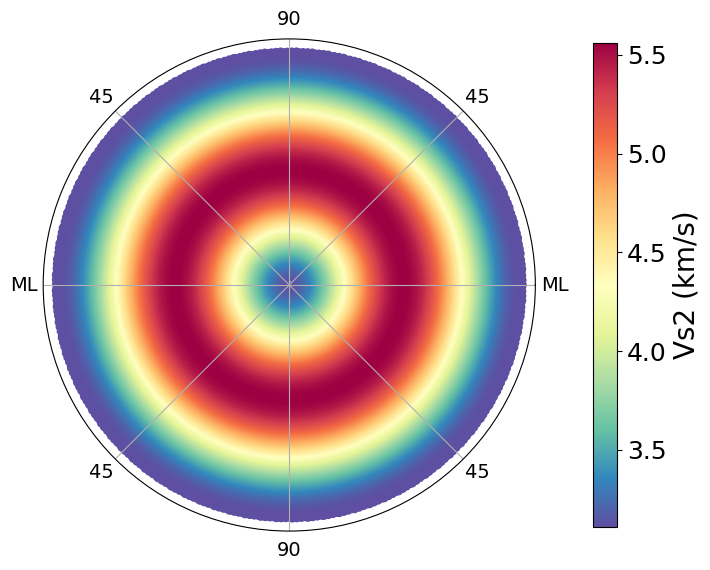

In [7]:
fig2, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsv'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

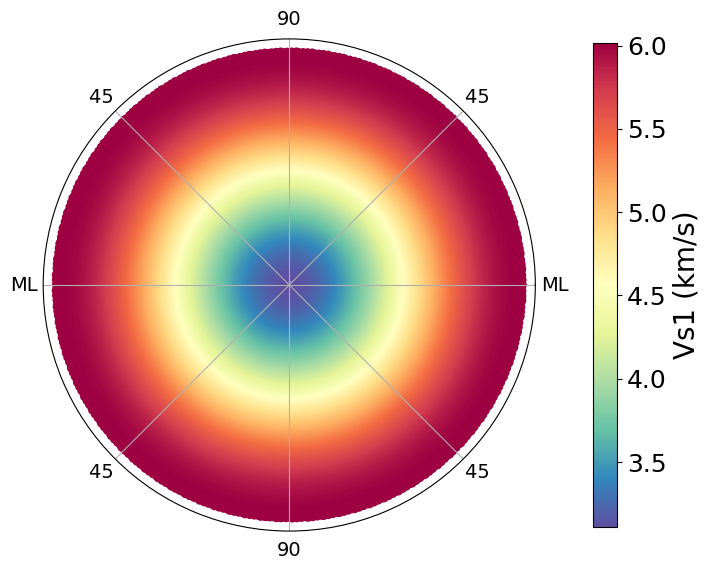

In [8]:
fig3, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsh'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

In [9]:
model2 = st.polar_anisotropy(chl)
model2

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.025977,0.000000,7.300033,3.116029,3.111383
2,0.026454,0.067775,7.299971,3.116274,3.111455
3,0.026922,0.135550,7.299909,3.116518,3.111528
4,0.027383,0.203325,7.299847,3.116762,3.111600
...,...,...,...,...,...
79995,1.570740,5.488482,8.835067,3.109423,5.267134
79996,1.570753,5.556257,8.835067,3.109423,5.267134
79997,1.570765,5.624032,8.835067,3.109423,5.267134
79998,1.570778,5.691807,8.835067,3.109423,5.267134


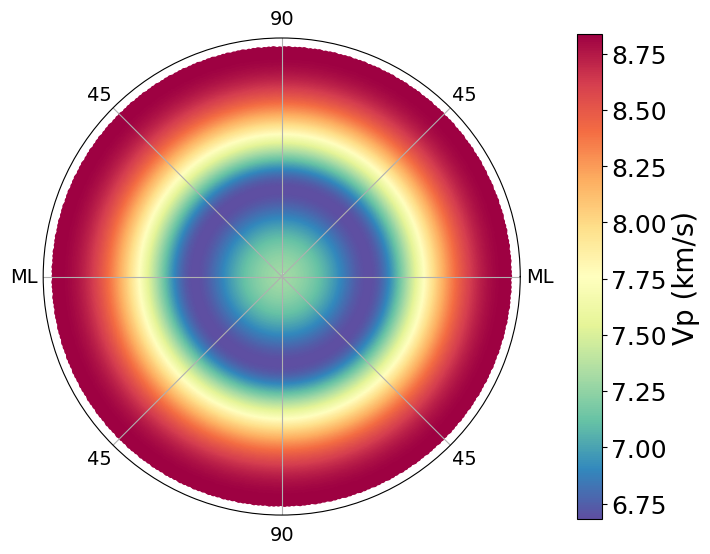

In [10]:
fig4, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model2['azimuthal_ang'],
                model2['polar_ang'],
                c=model2['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

## Test equispaced S2 grid

In [11]:
azimuths, polar = st.equispaced_S2_grid(n=100, degrees=True, hemisphere='upper')

In [12]:
polar

array([ 0.        , 14.69306988, 16.76852115, 18.61984807, 20.30848067,
       21.87217466, 23.33609785, 24.7180205 , 26.0310412 , 27.28514343,
       28.48814285, 29.64629375, 30.76469344, 31.84756125, 32.89843663,
       33.92032324, 34.91579607, 35.88708251, 36.83612471, 37.76462829,
       38.67410087, 39.56588287, 40.44117243, 41.30104578, 42.14647396,
       42.97833676, 43.79743437, 44.60449713, 45.40019391, 46.18513912,
       46.95989881, 47.72499593, 48.48091479, 49.22810507, 49.96698519,
       50.69794537, 51.42135027, 52.13754133, 52.84683884, 53.54954381,
       54.24593957, 54.9362933 , 55.62085729, 56.29987018, 56.97355798,
       57.64213507, 58.30580506, 58.96476161, 59.61918909, 60.2692633 ,
       60.91515206, 61.55701571, 62.19500769, 62.82927494, 63.45995836,
       64.08719317, 64.71110931, 65.33183175, 65.94948082, 66.56417244,
       67.17601848, 67.78512691, 68.39160211, 68.99554502, 69.59705339,
       70.19622194, 70.79314256, 71.38790443, 71.98059422, 72.57

In [13]:
azimuths

array([  0.        ,   0.        ,   3.88322208,   7.76644415,
        11.64966623,  15.53288831,  19.41611039,  23.29933246,
        27.18255454,  31.06577662,  34.9489987 ,  38.83222077,
        42.71544285,  46.59866493,  50.48188701,  54.36510908,
        58.24833116,  62.13155324,  66.01477532,  69.89799739,
        73.78121947,  77.66444155,  81.54766363,  85.4308857 ,
        89.31410778,  93.19732986,  97.08055194, 100.96377401,
       104.84699609, 108.73021817, 112.61344025, 116.49666232,
       120.3798844 , 124.26310648, 128.14632856, 132.02955063,
       135.91277271, 139.79599479, 143.67921687, 147.56243894,
       151.44566102, 155.3288831 , 159.21210518, 163.09532725,
       166.97854933, 170.86177141, 174.74499349, 178.62821556,
       182.51143764, 186.39465972, 190.2778818 , 194.16110387,
       198.04432595, 201.92754803, 205.8107701 , 209.69399218,
       213.57721426, 217.46043634, 221.34365841, 225.22688049,
       229.11010257, 232.99332465, 236.87654672, 240.75